In [8]:
import torch
import numpy as np
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi
from sbi.utils.get_nn_models import posterior_nn
from sbi import utils as utils
from sbi import analysis as analysis




In [11]:
import pickle as pk
rsv = 0
nLH = 200
df = np.loadtxt('/global/cfs/cdirs/lsst/www/shivamp/simulated_gy_modeling/create_SZ_maps/sample_chain_vary_params_np_3_num_' + str(nLH) + '_rs' + str(rsv) + '.txt')  
x_all = (df[:,1:])
nsim = x_all.shape[0]

minz = 0.35
maxz = 0.5
# rsv = 0
ji = 42
save_dir = '/global/cfs/cdirs/lsst/www/shivamp/simulated_gy_modeling/correlate_SZ_tracer/output/'
save_filename = 'temp_xi_gy_try0_HOD_SZ_nLHtot_' + str(nLH) + '_rs_' + str(rsv) + '_zrange_' + str(minz) + '_' + str(maxz) + '_LH_' + str(ji) + '.pkl'
saved = pk.load(open(save_dir + save_filename, 'rb'))
r_ji = saved['r'] 
xi_all = np.zeros((nsim, len(r_ji)))
ji_to_rm = []
for ji in range(nsim):
    try:
        save_filename = 'temp_xi_gy_try0_HOD_SZ_nLHtot_' + str(nLH) + '_rs_' + str(rsv) + '_zrange_' + str(minz) + '_' + str(maxz) + '_LH_' + str(ji) + '.pkl'
        saved = pk.load(open(save_dir + save_filename, 'rb'))
        xi_ji = saved['xi'] 
        xi_all[ji, :] = xi_ji
    except:
        ji_to_rm.append(ji)
        # print(ji)
ji_to_rm = np.array(ji_to_rm)
if len(ji_to_rm) > 0:
    xi_all_final1 = np.delete(xi_all, ji_to_rm, axis=0)
    theta_all_final1 = np.delete(x_all, ji_to_rm, axis=0)
else:
    xi_all_final1 = (xi_all)
    theta_all_final1 = (x_all)
    
    
    

In [12]:
import pickle as pk
rsv = 0
nLH = 400
df = np.loadtxt('/global/cfs/cdirs/lsst/www/shivamp/simulated_gy_modeling/create_SZ_maps/sample_chain_vary_params_np_3_num_' + str(nLH) + '_rs' + str(rsv) + '.txt')  
x_all = (df[:,1:])
nsim = x_all.shape[0]

minz = 0.35
maxz = 0.5

ji = 0
save_dir = '/global/cfs/cdirs/lsst/www/shivamp/simulated_gy_modeling/correlate_SZ_tracer/output/'
save_filename = 'temp_xi_gy_try0_HOD_SZ_nLHtot_' + str(nLH) + '_rs_' + str(rsv) + '_zrange_' + str(minz) + '_' + str(maxz) + '_LH_' + str(ji) + '.pkl'
saved = pk.load(open(save_dir + save_filename, 'rb'))
r_ji = saved['r'] 
xi_all = np.zeros((nsim, len(r_ji)))
ji_to_rm = []
for ji in range(nsim):
    try:
        save_filename = 'temp_xi_gy_try0_HOD_SZ_nLHtot_' + str(nLH) + '_rs_' + str(rsv) + '_zrange_' + str(minz) + '_' + str(maxz) + '_LH_' + str(ji) + '.pkl'
        saved = pk.load(open(save_dir + save_filename, 'rb'))
        xi_ji = saved['xi'] 
        xi_all[ji, :] = xi_ji
    except:
        ji_to_rm.append(ji)
        # print(ji)
ji_to_rm = np.array(ji_to_rm)
if len(ji_to_rm) > 0:
    xi_all_final2 = np.delete(xi_all, ji_to_rm, axis=0)
    theta_all_final2 = np.delete(x_all, ji_to_rm, axis=0)
else:
    xi_all_final2 = (xi_all)
    theta_all_final2 = (x_all)    
    
saved = pk.load(open('save_params_xi_all_num100.pk','rb'))
theta_all_final3, theta_all_final4 = saved['theta_all_final1'], saved['theta_all_final2']
xi_all_final3, xi_all_final4 = saved['xi_all_final1'], saved['xi_all_final2']



xi_all_final = np.vstack((xi_all_final1, xi_all_final2, xi_all_final3, xi_all_final4))
theta_all_final = np.vstack((theta_all_final1, theta_all_final2, theta_all_final3, theta_all_final4))


xi_all_final.shape, theta_all_final.shape

    
    

((388, 20), (388, 3))

In [67]:
import matplotlib
font = {'size'   : 18}
matplotlib.rc('font', **font)
# # Latex stuff
pl.rc('text', usetex=False)
pl.rc('font', family='serif')
%matplotlib inline


/tmp/ipykernel_32217/214644010.py:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = pl.colorbar(sm)


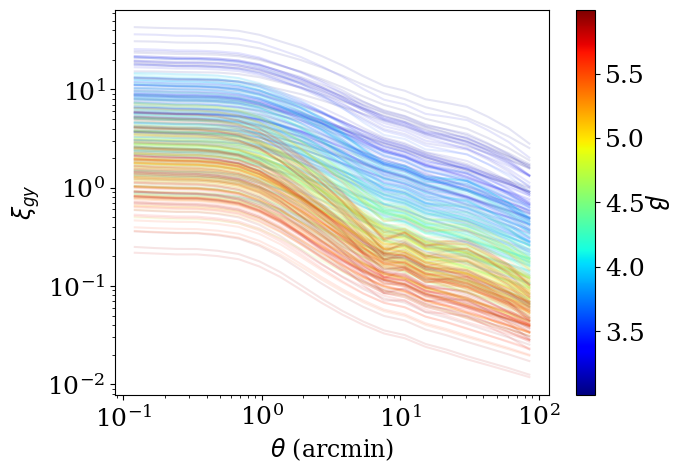

In [69]:
import matplotlib as mpl
jparam_tocolor = 2
# pl.figure()
fig, ax = pl.subplots(1,1, figsize = (7,5),sharex=True,gridspec_kw = {'hspace':0.05})

cmap = pl.get_cmap('jet',len(theta_all_final[:,jparam_tocolor]))
ind_sort = np.argsort(theta_all_final[:,jparam_tocolor])
xi_all_to_plot = -1*xi_all_final[ind_sort,:]
for ji in range(xi_all_to_plot.shape[0]):
    # color the line theta value
    pl.plot(r_ji, xi_all_to_plot[ji], color = cmap(ji), alpha=0.1)
norm = mpl.colors.Normalize(vmin=np.amin(theta_all_final[:,jparam_tocolor]),vmax=np.amax(theta_all_final[:,jparam_tocolor]))
sm = pl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
# plt.colorbar(sm, ticks=np.linspace(0,2,N), 
#              boundaries=np.arange(-0.05,2.1,.1))
cbar = pl.colorbar(sm)
cbar.ax.get_yaxis().labelpad = 18
cbar.ax.set_ylabel(r'$\beta$', rotation=270, fontsize = 17)

pl.xlabel(r'$\theta$ (arcmin)', fontsize = 17)
pl.ylabel(r'$\xi_{gy}$', fontsize = 17)
pl.xscale('log')
pl.yscale('log')



In [25]:
# theta, x = simulate_for_sbi(simulator, proposal=prior, num_simulations=1000)
num_dim = 3
prior = utils.BoxUniform(low=torch.tensor(np.array([10., -3., 3.])), high=torch.tensor([40., 3., 6.]))
inference = SNPE(prior)
density_estimator = inference.append_simulations(torch.tensor(theta_all_final, dtype=torch.float32), torch.tensor(xi_all_final, dtype=torch.float32)).train()
posterior = inference.build_posterior(density_estimator)



 Neural network successfully converged after 398 epochs.

In [26]:
save_dir = '/global/cfs/cdirs/lsst/www/shivamp/simulated_gy_modeling/correlate_SZ_tracer/output/' 
save_filename = 'temp_xi_gy_try0_HOD_SZ_zrange_' + str(minz) + '_' + str(maxz) + '_fid.pkl'
saved = pk.load(open(save_dir + save_filename, 'rb'))
# ji = 62
x_O = torch.tensor(saved['xi'])
theta_O  = torch.tensor([18.1, -0.758, 4.35])



In [28]:
posterior_samples = posterior.sample((20000,), x=x_O)



Drawing 20000 posterior samples: 20632it [00:02, 8679.05it/s]                             
Drawing 20000 posterior samples: 21708it [00:00, 133045.11it/s]                           
Drawing 20000 posterior samples: 20830it [00:01, 11780.32it/s]            


In [29]:
# %pip install getdist
import getdist
from getdist import plots, MCSamples
names = ['P0','alz','beta']
# labels =  [r'$P_0$',r'$\alpha_z$',r'$\beta$']
labels =  [r'P_0',r'alpha-z',r'beta']
samples = MCSamples(samples=posterior_samples.detach().numpy(),names = names, labels = labels)



Removed no burn in
Removed no burn in
Removed no burn in


In [30]:
%matplotlib inline
import matplotlib.pyplot as pl



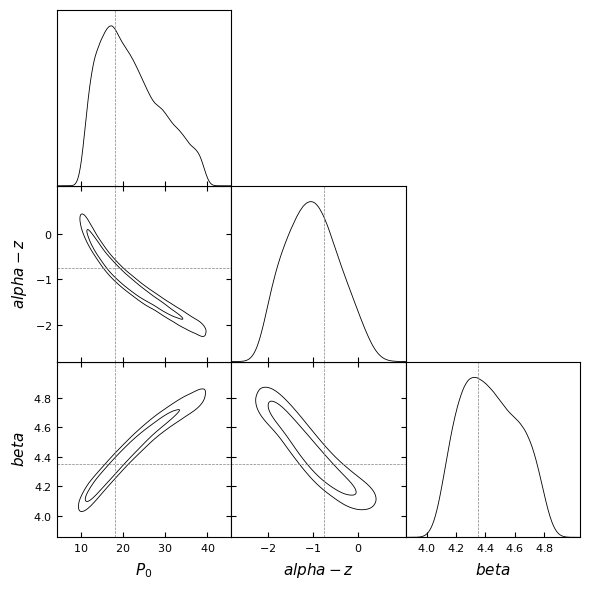

In [31]:
marker_dict = {'P0':theta_O[0],'alz':theta_O[1],'beta':theta_O[2]}
g = plots.get_subplot_plotter()
# g.triangle_plot([samples, samples1, samples2], filled=False, markers=marker_dict)
g.triangle_plot([samples], filled=False, markers=marker_dict)
# pl.show()
